# ML model training with anonymized data

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# dataset files location
folder_path = './datasets/'

In [75]:
df_anonim = pd.read_csv(folder_path + 'ccapproval_anonimization.csv')

In [76]:
df_anonim.head()

,id,gender,car,owns_house,edutp,houtp,age,has_mobilephone,has_phone,inc,...,wkphone,email,occyp,year_employed,chldno,famtp,famsize,begin_month,target,statementdate
0,*,F,N,Y,"{Academic degree, Higher education}","{Co-op apartment, House / apartment}","[21.0, 30.0[",1.0,1.0,"[101.3, 99.0[",...,1,0,*,"[0.0, 1.9[",0,Civil marriage,2,-5,0,12/9/20
1,*,F,N,Y,"{Academic degree, Higher education}","{Co-op apartment, House / apartment}","[21.0, 30.0[",1.0,1.0,"[101.3, 99.0[",...,1,0,*,"[0.0, 1.9[",0,Civil marriage,2,-2,0,12/12/20
2,*,F,N,Y,"{Academic degree, Higher education}","{Co-op apartment, House / apartment}","[21.0, 30.0[",1.0,0.0,"[101.3, 99.0[",...,0,0,*,"[0.0, 1.9[",0,Civil marriage,2,-10,0,12/4/20
3,*,F,N,Y,"{Academic degree, Higher education}","{Co-op apartment, House / apartment}","[21.0, 30.0[",1.0,0.0,"[101.3, 99.0[",...,0,0,*,"[0.0, 1.9[",0,Civil marriage,2,-12,0,12/2/20
4,*,F,N,Y,"{Academic degree, Higher education}","{Co-op apartment, House / apartment}","[21.0, 30.0[",1.0,0.0,"[101.3, 99.0[",...,0,0,*,"[0.0, 1.9[",0,Civil marriage,2,-54,0,12/8/16


In [77]:
df_anonim.shape

(25134, 21)

## Data processing
Feature dataset cleaning and shaping - pre prepation for training phase

In [78]:
# Check for null values
df_anonim.isnull().sum()

id                 0
gender             0
car                0
owns_house         0
edutp              0
houtp              0
age                0
has_mobilephone    0
has_phone          0
inc                0
inctp              0
wkphone            0
email              0
occyp              0
year_employed      0
chldno             0
famtp              0
famsize            0
begin_month        0
target             0
statementdate      0
dtype: int64

In [79]:
# remove unecessary features
df_anonim = df_anonim.drop(['id', 'statementdate', 'begin_month'], axis=1)

In [80]:
df_anonim.columns

Index(['gender', 'car', 'owns_house', 'edutp', 'houtp', 'age',
       'has_mobilephone', 'has_phone', 'inc', 'inctp', 'wkphone', 'email',
       'occyp', 'year_employed', 'chldno', 'famtp', 'famsize', 'target'],
      dtype='object')

In [81]:
df_anonim.head()

,gender,car,owns_house,edutp,houtp,age,has_mobilephone,has_phone,inc,inctp,wkphone,email,occyp,year_employed,chldno,famtp,famsize,target
0,F,N,Y,"{Academic degree, Higher education}","{Co-op apartment, House / apartment}","[21.0, 30.0[",1.0,1.0,"[101.3, 99.0[",Commercial associate,1,0,*,"[0.0, 1.9[",0,Civil marriage,2,0
1,F,N,Y,"{Academic degree, Higher education}","{Co-op apartment, House / apartment}","[21.0, 30.0[",1.0,1.0,"[101.3, 99.0[",Commercial associate,1,0,*,"[0.0, 1.9[",0,Civil marriage,2,0
2,F,N,Y,"{Academic degree, Higher education}","{Co-op apartment, House / apartment}","[21.0, 30.0[",1.0,0.0,"[101.3, 99.0[",Working,0,0,*,"[0.0, 1.9[",0,Civil marriage,2,0
3,F,N,Y,"{Academic degree, Higher education}","{Co-op apartment, House / apartment}","[21.0, 30.0[",1.0,0.0,"[101.3, 99.0[",Working,0,0,*,"[0.0, 1.9[",0,Civil marriage,2,0
4,F,N,Y,"{Academic degree, Higher education}","{Co-op apartment, House / apartment}","[21.0, 30.0[",1.0,0.0,"[101.3, 99.0[",Working,0,0,*,"[0.0, 1.9[",0,Civil marriage,2,0


In [82]:
df_anonim.dtypes

gender              object
car                 object
owns_house          object
edutp               object
houtp               object
age                 object
has_mobilephone    float64
has_phone          float64
inc                 object
inctp               object
wkphone              int64
email                int64
occyp               object
year_employed       object
chldno               int64
famtp               object
famsize              int64
target               int64
dtype: object

In [83]:
df_anonim['has_mobilephone'] = df_anonim['has_mobilephone'].astype(int)
print(df_anonim['has_mobilephone'])

0        1
1        1
2        1
3        1
4        1
        ..
25129    1
25130    1
25131    1
25132    1
25133    1
Name: has_mobilephone, Length: 25134, dtype: int64


In [84]:
df_anonim.has_mobilephone.sum()

25134

In [85]:
# remove unecessary features
df_anonim = df_anonim.drop(['has_mobilephone'], axis=1)

In [86]:
df_anonim.shape

(25134, 17)

In [87]:
categorical_columns = df_anonim.select_dtypes(['object']).columns
print(categorical_columns)

Index(['gender', 'car', 'owns_house', 'edutp', 'houtp', 'age', 'inc', 'inctp',
       'occyp', 'year_employed', 'famtp'],
      dtype='object')


In [88]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical data into numerical
label_encoder = LabelEncoder()

for colname in categorical_columns:
    df_anonim[colname] = label_encoder.fit_transform(df_anonim[colname])

In [89]:
df_anonim.head()

,gender,car,owns_house,edutp,houtp,age,has_phone,inc,inctp,wkphone,email,occyp,year_employed,chldno,famtp,famsize,target
0,0,0,1,1,1,1,1.0,1,0,1,0,0,1,0,1,2,0
1,0,0,1,1,1,1,1.0,1,0,1,0,0,1,0,1,2,0
2,0,0,1,1,1,1,0.0,1,4,0,0,0,1,0,1,2,0
3,0,0,1,1,1,1,0.0,1,4,0,0,0,1,0,1,2,0
4,0,0,1,1,1,1,0.0,1,4,0,0,0,1,0,1,2,0


In [90]:
df_anonim.describe()

,gender,car,owns_house,edutp,houtp,age,has_phone,inc,inctp,wkphone,email,occyp,year_employed,chldno,famtp,famsize,target
count,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.0,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000
mean,0.378133,0.418397,0.654930,2.102889,1.007440,2.166388,0.292791,7.331782,2.681825,0.273812,0.100660,0.0,7.834408,0.512334,1.994589,2.294064,0.016790
std,0.484931,0.493306,0.475401,1.153171,0.602836,1.242815,0.455052,5.494901,1.773317,0.445923,0.300885,0.0,6.438458,0.787785,1.089466,0.947590,0.128486
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,2.000000,2.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,1.000000,2.000000,0.000000,7.000000,4.000000,0.000000,0.000000,0.0,7.000000,0.000000,2.000000,2.000000,0.000000
75%,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,1.000000,10.000000,4.000000,1.000000,0.000000,0.0,15.000000,1.000000,2.000000,3.000000,0.000000
max,1.000000,1.000000,1.000000,3.000000,3.000000,5.000000,1.000000,20.000000,4.000000,1.000000,1.000000,0.0,17.000000,19.000000,5.000000,20.000000,1.000000


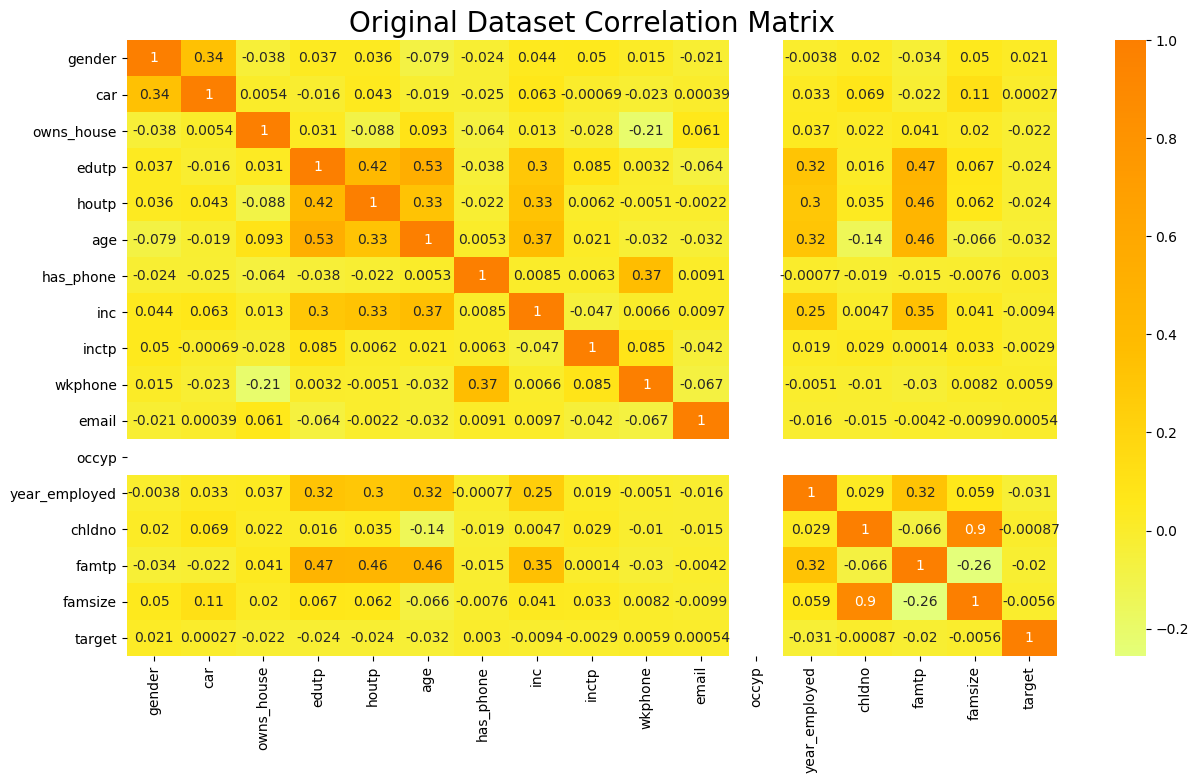

In [91]:
# check features correlation
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df_anonim.corr(), cmap = 'Wistia', annot = True)
plt.title('Original Dataset Correlation Matrix', fontsize = 20)
plt.show()

Variables appear to have better correlation between them in comparison with the correlation matrix in "original" notebook!

Going to visualize some features to understand them better

In [140]:
df_anonim['occyp'].value_counts()

0    23694
Name: occyp, dtype: int64

In [141]:
df_anonim = df_anonim.drop(['occyp'], axis=1)

In [142]:
df_anonim['gender'].value_counts()

0    14835
1     8859
Name: gender, dtype: int64

In [143]:
df_anonim['has_phone'].value_counts()

0.0    16779
1.0     6915
Name: has_phone, dtype: int64

In [144]:
df_anonim['chldno'].value_counts()

0     15059
1      5772
2      2516
3       273
4        52
5        17
14        3
7         2
Name: chldno, dtype: int64

In [145]:
df_anonim['target'].value_counts()

0    23470
1      224
Name: target, dtype: int64

In [146]:
df_anonim['inc'].value_counts()

4     3073
0     2990
6     2274
1     2143
9     2143
7     2023
8     1490
11    1275
13    1230
20    1215
10     864
14     702
17     562
5      412
3      376
15     340
16     299
19     113
18     104
12      52
2       14
Name: inc, dtype: int64

In [147]:
def plot_columns(df, name):
    fig, ax =plt.subplots(1, 2, figsize=(20,10))
    sns.distplot(df[name], ax=ax[0])
    sns.boxplot(df[name], ax=ax[1])
    plt.show()

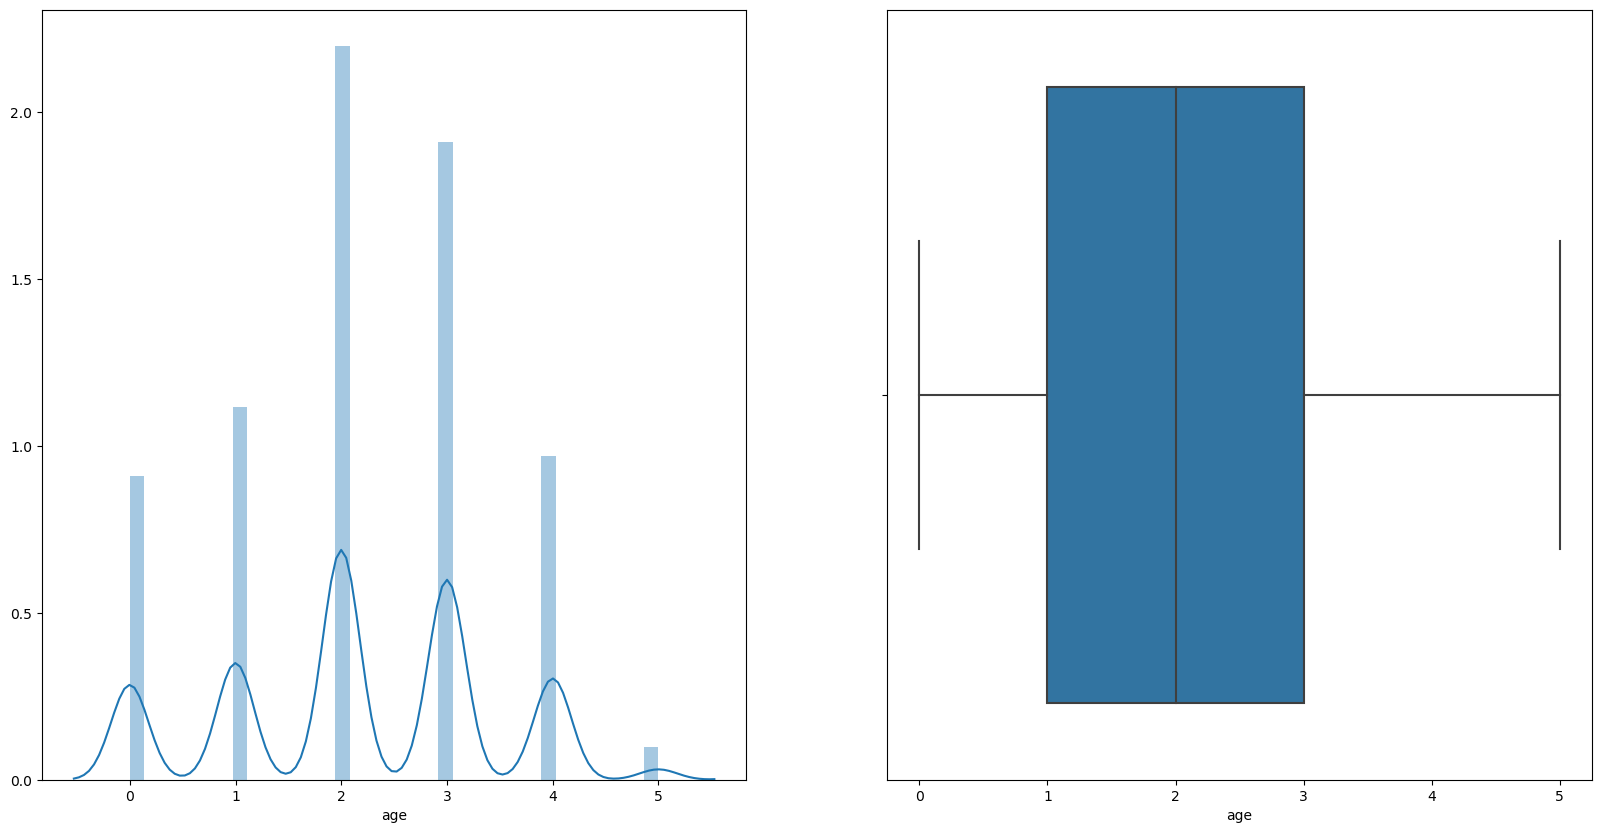

In [148]:
plot_columns(df_anonim, 'age')

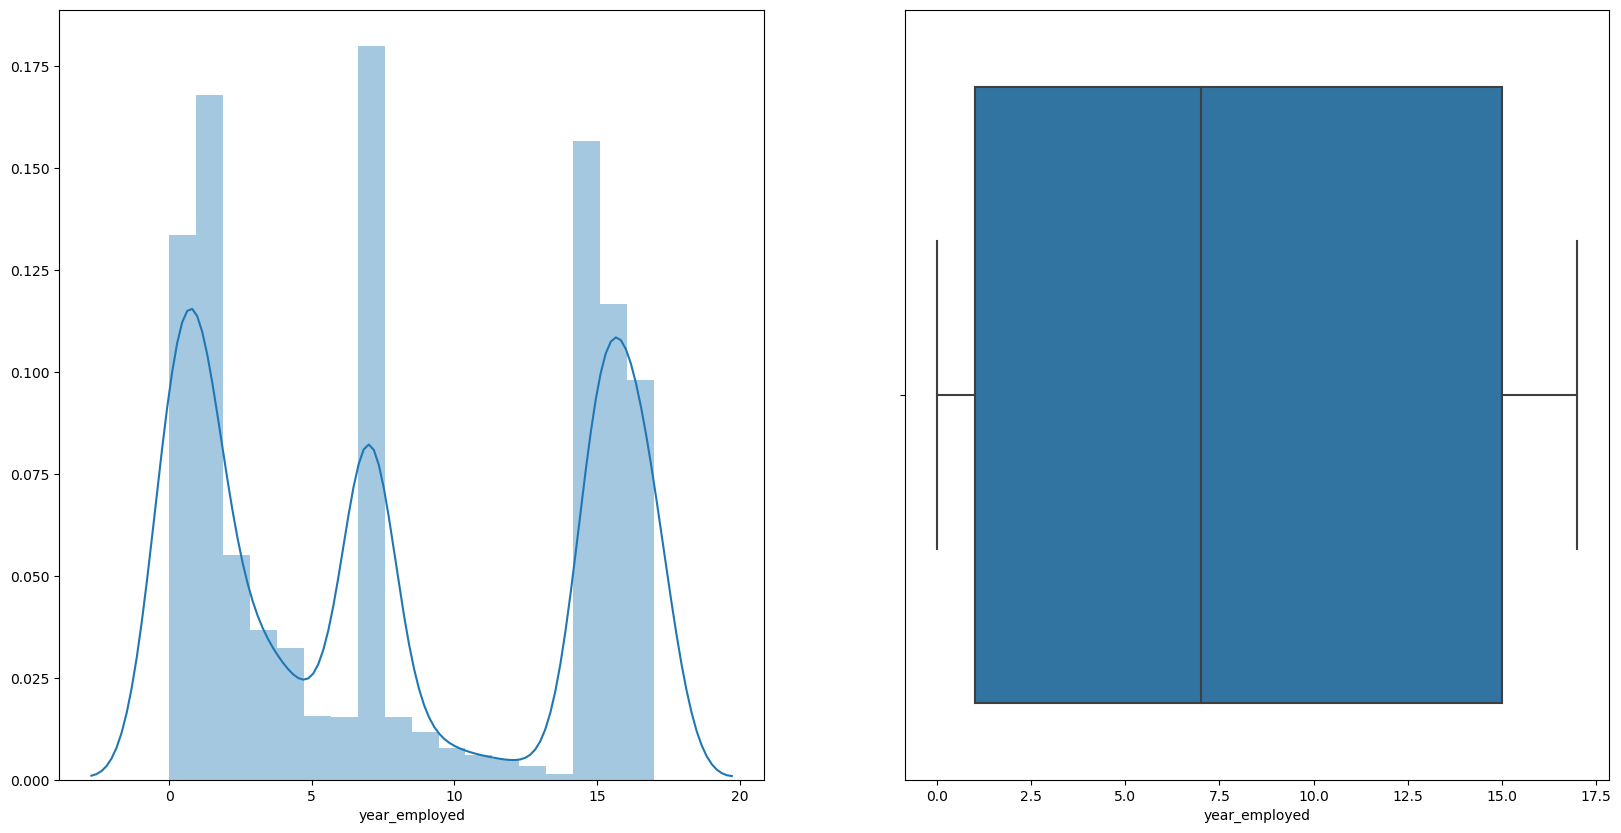

In [149]:
plot_columns(df_anonim, 'year_employed')

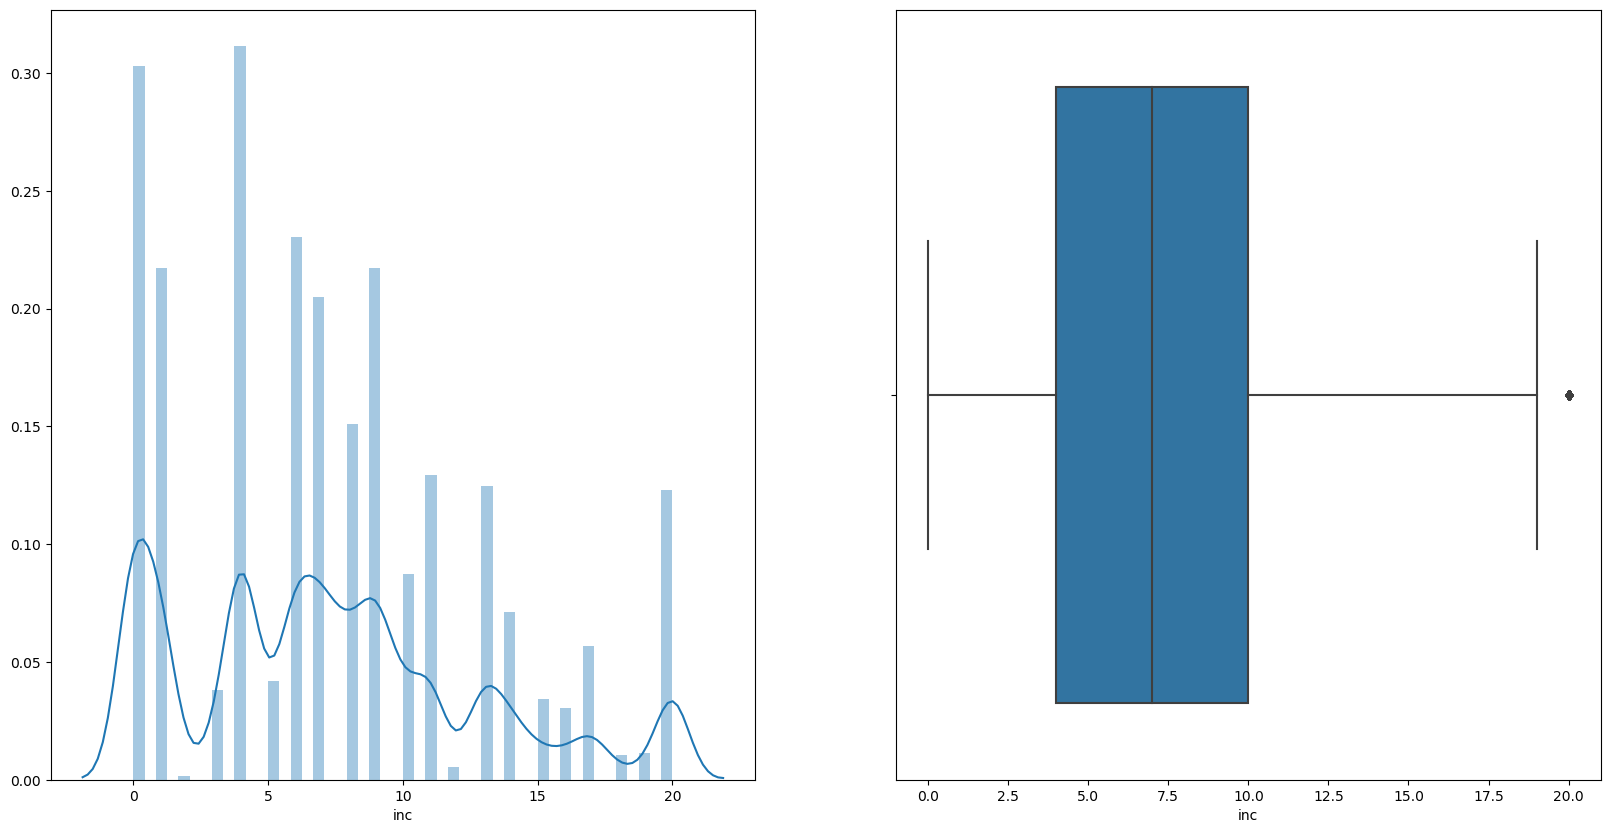

In [150]:
plot_columns(df_anonim, 'inc')

### Important Notes

- As noted in the "original" notebook the target variable show imbalanced proportion which may affect the prediction capability. Although, in a early stage experiments, I trained some models that showed good scoring results, this was misleading due to the fact that confusion matrix and AUC value had poor performances. In order to resolve this issue im going to apply some data cleaning techniques: 
    - remove outliers;
    - reduce dimensionality;
- The anonimization process seem to have supressed the existing outliers. Going to apply dbscan anyway, just in case.

## Data Cleaning

Outlier removal using DBSCAN

In [151]:
# DBSCAN
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(eps=0.5, min_samples=2)
clusters = outlier_detection.fit_predict(df_anonim)
print("Clusters:", clusters)

# concatenate clusters with customer data
df_anonim['clusters'] = pd.Series(clusters, index=df_anonim.index)
# print(df_anonim)

outliers = df_anonim[df_anonim['clusters']==-1]
print("Number of outliers:", len(outliers))

Clusters: [   0    0    1 ... 3859 3933 3976]
Number of outliers: 0


In [153]:
df_anonim['clusters'].value_counts()

3869    136
3691     80
3874     72
3871     60
3719     53
       ... 
1691      2
1126      2
3191      2
3255      2
0         2
Name: clusters, Length: 4036, dtype: int64

In [154]:
df_anonim = df_anonim[df_anonim['clusters'] != -1]

In [155]:
df_anonim.shape

(23694, 17)

In [156]:
df_anonim = df_anonim.drop(['clusters'], axis=1)

In [157]:
df_anonim['target'].value_counts()

0    23470
1      224
Name: target, dtype: int64

In [158]:
# target vector - target
y = df_anonim['target']

# feature matrix
X = df_anonim.loc[:, df_anonim.columns != 'target']

In [159]:
from sklearn.model_selection import train_test_split

# training and testing splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape)
print(X_test.shape)

(18955, 15)
(4739, 15)


Data standardization

In [160]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dimensionality reduction using PCA

In [163]:
from sklearn.decomposition import PCA

# reduced dataset dimensionality ir order to select best features and improve training results
pca = PCA(n_components=13)
pca.fit(X_train_scaled)
# transform data accordinh to the chosen components
X_pca_train = pca.transform(X_train_scaled)
X_pca_test = pca.transform(X_test_scaled)
print("Original shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca_train.shape)))

Original shape: (18955, 15)
Reduced shape: (18955, 13)


In [164]:
pca.explained_variance_ratio_

array([0.19178969, 0.1334036 , 0.09861702, 0.08922392, 0.07163053,
       0.06610852, 0.0630831 , 0.05012763, 0.04641046, 0.04365495,
       0.04302272, 0.03917637, 0.03396046])

## Models training

In [165]:
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

#### Logistic Regression

In [166]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.1)
lr_model.fit(X_pca_train, y_train)

LogisticRegression(C=0.1)

In [167]:
lr_train_score = lr_model.score(X_pca_train, y_train)
print("Train set score: {:.3f}".format(lr_train_score))

lr_test_score = lr_model.score(X_pca_test, y_test)
print("Test set score: {:.3f}".format(lr_test_score))

Train set score: 0.990
Test set score: 0.991


In [168]:
log_auc = roc_auc_score(y_test, lr_model.decision_function(X_pca_test))
print("AUC for Logistic Regression: {:.3f}".format(log_auc))

AUC for Logistic Regression: 0.557


In [169]:
y_lr_pred = lr_model.predict(X_pca_test)

In [170]:
confusion_matrix(y_test, y_lr_pred)

array([[4698,    0],
       [  41,    0]])

In [171]:
res = pd.DataFrame({
    'Model': ['logistic regression'], 
    'Train score': [lr_train_score], 
    'Test score': [lr_test_score],
    'AUC': [log_auc]
})

In [172]:
res

,Model,Train score,Test score,AUC
0,logistic regression,0.990346,0.991348,0.556506


<h4> K Nearest Neighbours </h4>

In [121]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(X_pca_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [122]:
knn_train_score = knn_model.score(X_pca_train, y_train)
print("Train set score: {:.3f}".format(knn_train_score))

knn_test_score = knn_model.score(X_pca_test, y_test)
print("Test set score: {:.3f}".format(knn_test_score))

Train set score: 0.991
Test set score: 0.989


In [123]:
y_knn_pred = knn_model.predict(X_pca_test)

In [124]:
confusion_matrix(y_test, y_knn_pred)

array([[4689,    4],
       [  46,    0]])

In [125]:
knn_auc = roc_auc_score(y_test, knn_model.predict_proba(X_pca_test)[:, 1])
print("AUC for KNN: {:.3f}".format(knn_auc))

AUC for KNN: 0.874


In [126]:
knn_res = pd.DataFrame({
    'Model': ['KNN'], 
    'Train score': [knn_train_score], 
    'Test score': [knn_test_score],
    'AUC': [knn_auc]
})

res = res.append(knn_res, ignore_index=True)

<h4> Support Vector Machine </h4>

In [127]:
from sklearn import svm

param = {'C' : [0.1, 0.5, 1.0, 5.0, 10.0, 50.0]}
svm_model = GridSearchCV(svm.SVC(), param)
svm_model.fit(X_pca_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1.0, 5.0, 10.0, 50.0]})

In [128]:
svm_model.best_estimator_

SVC(C=50.0)

In [129]:
svm_train_score = svm_model.score(X_pca_train, y_train)
print("Train set score: {:.3f}".format(svm_train_score))
svm_test_score = svm_model.score(X_pca_test, y_test)
print("Test set score: {:.3f}".format(svm_test_score))

Train set score: 0.993
Test set score: 0.990


In [130]:
y_svm_pred = svm_model.predict(X_pca_test)

In [131]:
confusion_matrix(y_test, y_svm_pred)

array([[4685,    8],
       [  39,    7]])

In [132]:
svm_auc = roc_auc_score(y_test, svm_model.decision_function(X_pca_test))
print("AUC for SVM: {:.3f}".format(svm_auc))

AUC for SVM: 0.901


In [133]:
svm_res = pd.DataFrame({
    'Model': ['SVM'], 
    'Train score': [svm_train_score], 
    'Test score': [svm_test_score],
    'AUC': [svm_auc]
})

res = res.append(svm_res, ignore_index=True)

In [134]:
res

,Model,Train score,Test score,AUC
0,logistic regression,0.990609,0.990293,0.659736
1,KNN,0.990873,0.989449,0.874459
2,SVM,0.993036,0.990082,0.900787


Final Intakes:
* The models created using the original untouched dataset had slightly better performance;
* AUC and test score on KNN and SVM (best models) had a small downgrade;
* Anonimized dataset was already clean of outliers - dbscan was unnecessary;
* Although the models using the original dataset performed better, the models with anonimized data also performed well and I believe the downgrade wasnt that impactfull. The models are still solid. The cost of model performance by anonimizing and "losing" some data is small against the gains of having the data protected and still having acceptable models. 